In [1]:
#used for sampling
import random 

#data handling
import numpy as np
import pandas as pd

#data visualisation
import matplotlib.pyplot as plt

#handling missing values where not dropped
from sklearn.impute import SimpleImputer

# creating training and test datasets for ML
from sklearn.model_selection import train_test_split

# for evaluating our models
from sklearn.metrics import mean_squared_error

# Transaction Dataset

## Import Dataset

The transactions dataset is over 3gb in size. This will be slow and unweidly if we imported it all. Instead we will sample it and import only some of the data

In [2]:
transactions_train_df = pd.read_csv("data/transactions_train.csv")

## Check for Missing Values

In [3]:
#check for missing values
def check_missing(x):
    # ref: https://stackoverflow.com/questions/59694988/python-pandas-dataframe-find-missing-values
    try:
        missing = x.isnull().sum()
        print(x.shape)
        print(missing)
    except:
        print("An issue occured. Check dataframe.")

In [4]:
check_missing(transactions_train_df)

(31788324, 5)
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


## Check result

In [5]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [6]:
transactions_train_df['customer_id'] = transactions_train_df['customer_id'].values.astype(str)

In [7]:
transactions_train_df['article_id'] = transactions_train_df['article_id'].values.astype(str)

In [8]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        object 
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ GB


In [9]:
transactions_train_df.describe()

,price,sales_channel_id
count,3.178832e+07,3.178832e+07
mean,2.782927e-02,1.704028e+00
std,1.918113e-02,4.564786e-01
min,1.694915e-05,1.000000e+00
25%,1.581356e-02,1.000000e+00
50%,2.540678e-02,2.000000e+00
75%,3.388136e-02,2.000000e+00
max,5.915254e-01,2.000000e+00


# Articles Dataset

## Import Dataset

In [10]:
articles_df = pd.read_csv("data/articles.csv")

## Check for Missing Values

In [11]:
check_missing(articles_df)

(105542, 25)
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


In [12]:
articles_df.tail()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
105541,959461001,959461,Lounge dress,265,Dress,Garment Full body,1010016,Solid,11,Off White,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Calf-length dress in ribbed jersey made from a...


# Customer Dataset

## Import Dataset

In [13]:
customers_df = pd.read_csv("data/customers.csv")

## Check for Missing Values

In [14]:
check_missing(customers_df)

(1371980, 7)
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64


## Fix Missing Values

In [15]:
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

club_member_status = customers_df.iloc[:, 3:-3].values
fashion_news_frequency = customers_df.iloc[:, 4:-2].values
age = customers_df.iloc[:, 5:-1].values

#ref: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer_med = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#we replace missing values with the most frequent
imputer_mf.fit(club_member_status)
club_member_status = imputer_mf.transform(club_member_status)

imputer_mf.fit(fashion_news_frequency)
fashion_news_frequency = imputer_mf.transform(fashion_news_frequency)

#we replace any missing age values with the median age
imputer_med.fit(age)
age = imputer_med.transform(age)

#now add corrected columns back into our main customer dataframe
customers_df.iloc[:, 3:-3] = club_member_status
customers_df.iloc[:, 4:-2] = fashion_news_frequency
customers_df.iloc[:, 5:-1] = age

#replace minus sign in text and check result of dataset after imputing missing values
customers_df.columns = customers_df.columns.str.replace('-', '')

#lower case columns
customers_df.columns = map(str.lower, customers_df.columns)

#check if missing values are still an issue
missing = customers_df.isnull().sum() # ref: https://stackoverflow.com/questions/59694988/python-pandas-dataframe-find-missing-values
print(customers_df.shape)
print(missing)

(1371980, 7)
customer_id               0
fn                        0
active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64


In [16]:
customers_df.tail()

,customer_id,fn,active,club_member_status,fashion_news_frequency,age,postal_code
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,0.0,0.0,PRE-CREATE,NONE,65.0,0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...


# Create a rating matrix
Since we don't actual have item ratings like a 1 to 5 rating per item, we will assume qty of purchase indicates rating value of a product (e.g customer must like product A if they bought 5 of it). However if we have outliers they may bias our data. In this case we can assume that 68% of data will lie within 1 standard deviation from the mean so we could take any thing 3 standard deviations from the mean as rare events and remove them.

In [17]:
#customer | article | qty (158342)
transaction_qty_df = transactions_train_df.groupby(['customer_id','article_id']).size().reset_index().rename(columns={0:'qty'})

## Inspect data and remove outliers

In [18]:
ratings['qty'].size # 27,306,439

27306439

In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27306439 entries, 0 to 27306438
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   customer_id  object
 1   article_id   object
 2   qty          int64 
dtypes: int64(1), object(2)
memory usage: 625.0+ MB


In [20]:
ratings.describe()

,qty
count,2.730644e+07
mean,1.164133e+00
std,5.721803e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,5.700000e+02


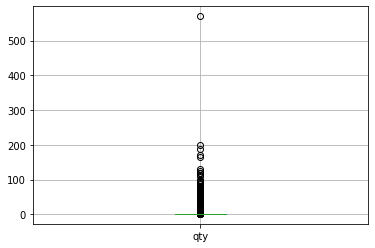

In [21]:
boxplot = ratings.boxplot(column=['qty'])

1 Standard Deviation is 5.72. 68% of data falls within 1 std dev. 99.7% falls within 3 Standard Deviations. We can use this to remove outliers. We know the minimum value is 1.0 so there are no negative values in our dataset.

In [22]:
std = ratings.qty.std() * 10
cutoff = std * 3
cutoff

17.165408433088903

In [23]:
mean = ratings.qty.mean()

In [24]:
upper = mean+cutoff
print("upper: " + str(upper))

upper: 18.32954133229264


In [25]:
ratings.loc[ratings['qty'] > upper]

,customer_id,article_id,qty
44044,006d4d3564072c27710509891093efa1324be6aaef0de3...,727880001,78
46417,00750c6950d9a61ee44ed4520ef7262841a2e497956874...,158340001,21
78878,00bef970777120c0d28794208adcd83bc023cb315fa59e...,610776026,50
142685,0152964ef19824d631d28ee3327a010fbfc528cdaf5bf0...,756322001,120
191867,01c3901f1accc7f12268b24ea83e47f76bdf71e4d82da1...,778064001,23
...,...,...,...
27192199,fefb56faca51b2e9de0082a3da3379e1fd41709509f6a4...,795164001,30
27250941,ff7dceb4dbc99277091f7adaa81932a7ea237b7e108a69...,507910001,26
27261558,ff95fd793d6cfbbac2ce3d7f850a0f7d4270dbd4fb1350...,507909003,27
27276104,ffbc3ce4b0fae2de39ce955ea3fdb619eb8da7411d778c...,629758013,48


In [26]:
 ratings = ratings.loc[ratings['qty'] < upper]

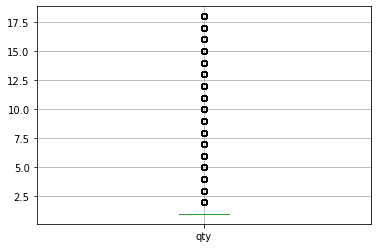

In [27]:
boxplot = ratings.boxplot(column=['qty'])

In [28]:
ratings['qty'].size #27,305,011

27305011

In [29]:
ratings.describe()

,qty
count,2.730501e+07
mean,1.162673e+00
std,5.133228e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.800000e+01


In the transactions dataset, after we removed the outliers, we saw that customers bought, between 1 and 18 quantities of an item. We can model this now as a prediction problem were we want to predict the qty a customer will buy for each item. However we will model this as a regression problem because we could have a situation where the person buys, say a qty of 4. A classification problem would only consider 1 to 3 as a misclassification, where as a regression model would award negative weights appropriately when qty is from 1 and 3. We also have over 27 million rows which we may not need to build a good model. For memory constraints we will sample only 25,000 rows. Since we are taking qty bought as a rating, this would be 25k random ratings.

In [30]:
ratings_100k = ratings.sample(n = 25000)
ratings_100k['qty'].size

25000

Out of our training set of 18,307 customers rating 12,923 products we can see that 99% of our products are not rated!

# Model Based Collaborative Filter using KNN

In [31]:
#Import the required classes and methods from the surprise library
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate


#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing

reader = Reader()
#Create the dataset to be used for building the filter
data = Dataset.load_from_df(ratings_100k, reader)
#Define the algorithm object; in this case kNN
knn = KNNBasic()

# Run 5-fold cross-validation and then print results
cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5823  0.5083  0.5049  0.5499  0.5047  0.5300  0.0312  
Fit time          8.62    10.73   7.24    7.21    7.18    8.20    1.38    
Test time         0.04    0.09    0.03    0.03    0.04    0.05    0.02    


{'test_rmse': array([0.58225895, 0.50826668, 0.50494929, 0.54994398, 0.5046847 ]),
 'fit_time': (8.624926328659058,
  10.725609302520752,
  7.237117052078247,
  7.211538076400757,
  7.180856943130493),
 'test_time': (0.038878679275512695,
  0.09090518951416016,
  0.029913902282714844,
  0.033997297286987305,
  0.03786635398864746)}

# Model Based Collaborative Filter using Singular-value decomposition

In [32]:
#Import SVD
from surprise import SVD

#Define the SVD algorithm object
svd = SVD()

#Evaluate the performance in terms of RMSE
cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5452  0.5334  0.4970  0.5234  0.5517  0.5301  0.0192  
Fit time          1.14    1.08    1.08    1.09    1.08    1.09    0.02    
Test time         0.07    0.03    0.02    0.02    0.02    0.03    0.02    


{'test_rmse': array([0.54517259, 0.53344997, 0.49695098, 0.52343501, 0.55171126]),
 'fit_time': (1.1386120319366455,
  1.0781166553497314,
  1.0811092853546143,
  1.094043254852295,
  1.0791590213775635),
 'test_time': (0.06887340545654297,
  0.02792501449584961,
  0.022937774658203125,
  0.022939443588256836,
  0.022930622100830078)}